# Implementación de los polinomios de Taylor

Serie de Taylor
$$f(t)=f(t_0)+f^{(1)}(t_0)(t-t_0)+\frac{f^{(2)}(t_0)}{2!}(t-t_0)^2+\cdots +\frac{f^{(n)}(t_0)}{n!}(t-t_0)^n+\cdots$$

$$f(t)=\cos(t)$$
$$f(t)=f(t_0)+f^{(1)}(t_0)(t-t_0)+\frac{f^{(2)}(t_0)}{2!}(t-t_0)^2+\cdots +\frac{f^{(n)}(t_0)}{n!}(t-t_0)^n+\cdots$$

*Función con dos o más parametros*

In [1]:
include("Taylor0.jl")
using AT
f1(t,x,y)=y
f2(t,x,y)=-ω²*x       #Oscilador armónico
f3(t,x,y)=ω²*sin(x)  #ecuación del péndulo
using PyPlot

integrador2 (generic function with 1 method)

## Para desplazamientos pequeños $x\approx\sin(x)$

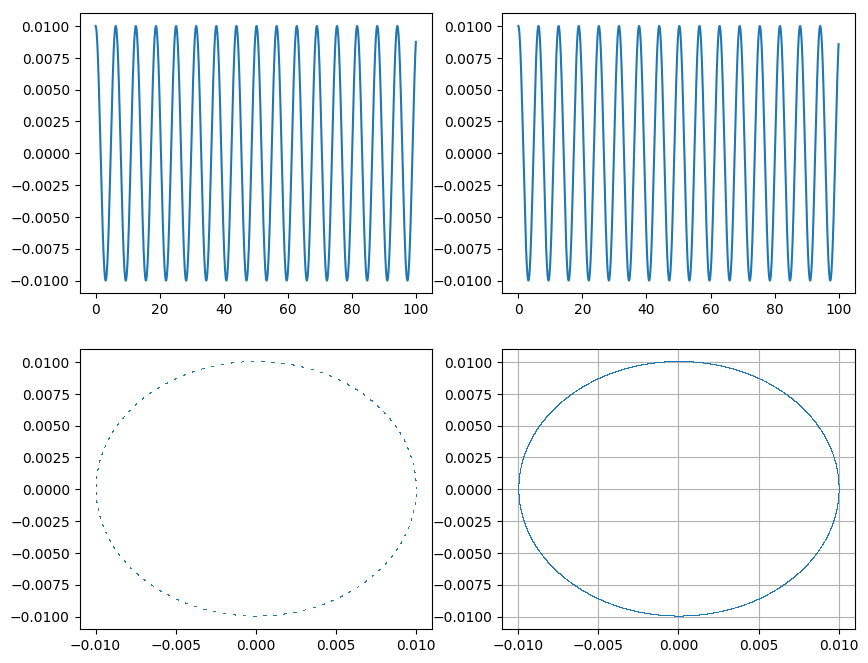

In [2]:
ω²=1.0 #coeficiente de f2
x0=0.01 #condición inicial en x(desplazamiento pequeño)
y0=0.0 #condición inicial en la derivada de x
t0=0.0
tf=100.0  #tiempo final de 100 segundos
N=25
ϵ=1e-52
h=0.01
t1,x1,y1=metRungeKutta2(f1,f2,t0,tf,x0,y0,h)
t,x,y=integrador(f1,f2,x0,y0,t0,tf,ϵ,N)
fig = figure(figsize = (10, 8))
ax = subplot(221); bx = subplot(222)
ay = subplot(223); by = subplot(224)
ax[:plot](t, x); bx[:plot](t1, x1)
ay[:plot](x, y,label="E-fase",","); by[:plot](x1, y1,label="E-fase",",")
grid()

***Comparo las últimas gráficas con la función analítica***

$$\ddot{x}=-x\hspace{0.5cm}\Rightarrow\ddot{x}+x=0\hspace{0.5cm}\mbox{como }\ddot{x}+\omega^2x=0$$
$$\Rightarrow \:\:x(t)=A\sin\left(\omega t +\phi\right)\hspace{1.5cm}\dot{x}(0)=A\omega\cos\left(\omega t +\phi\right)$$
Con las condiciones iniciales $x(0)=0.01$ y $\dot{x}(0)=0.0$

$$\begin{array}{l}
   A\sin\left(\phi\right)=0.01\\
   A\omega\cos\left(\phi\right)=0
\end{array}\hspace{1cm}\Rightarrow\phi=\frac{\pi}{2}\hspace{.3cm}A=0.01\hspace{1cm}x(t)=0.01\cos\left(t\right)\hspace{.3cm}\dot{x}(t)=-0.01\sin\left(t\right)$$


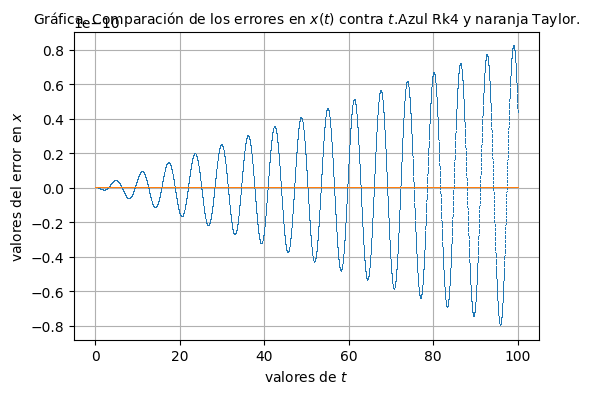

In [3]:
F(t)=0.01*cos(t)
dF(t)=-0.01*sin(t)
xan=F.(t);yan=dF.(t)
xan1=F.(t1);yan1=dF.(t1)
figure(figsize=(6,4)) # este comando define el tamaño de la figura
plot(t1,xan1-x1,",")
plot(t,xan-x,",")
title(L"Gráfica. Comparación de los errores en $x(t)$ contra $t$.Azul Rk4 y naranja Taylor.", fontsize=10)
xlabel(L"valores de $t$")
ylabel(L"valores del error en $x$")
grid()

*El método de Taylor es mucho más exacto.*

## Ahora la prueba fundamental es comparar la ecuación $\ddot{x}=-\sin(x)$

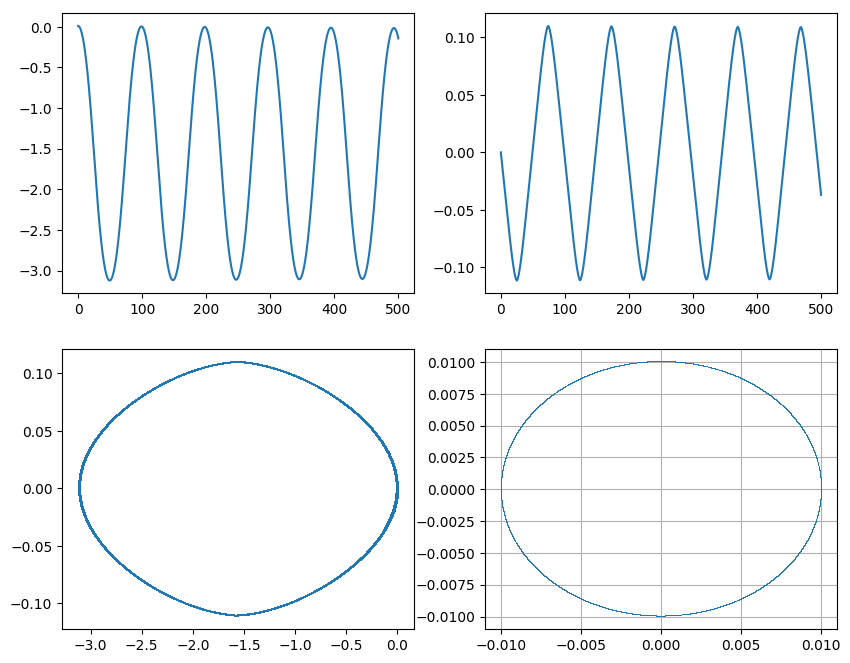

In [12]:
ω²=-1.0
x0=0.01 #desplazamiento pequeño
y0=0.0 #condición inicial en la derivada de x
t0=0.0
tf=500.0  #tiempo final de 100 segundos
N=25
ϵ=1e-52
h=0.01
sint1,sinx1,siny1=metRungeKutta2(f1,f3,t0,tf,x0,y0,h)
sint,sinx,siny=integrador2(f1,f3,x0,y0,t0,tf,ϵ,N)
fig = figure(figsize = (10, 8))
ax = subplot(221); bx = subplot(222)
ay = subplot(223); by = subplot(224)
ax[:plot](sint, sinx); bx[:plot](sint, siny)
ay[:plot](sinx, siny,label="E-fase",","); by[:plot](sinx1, siny1,label="E-fase",",")
grid()

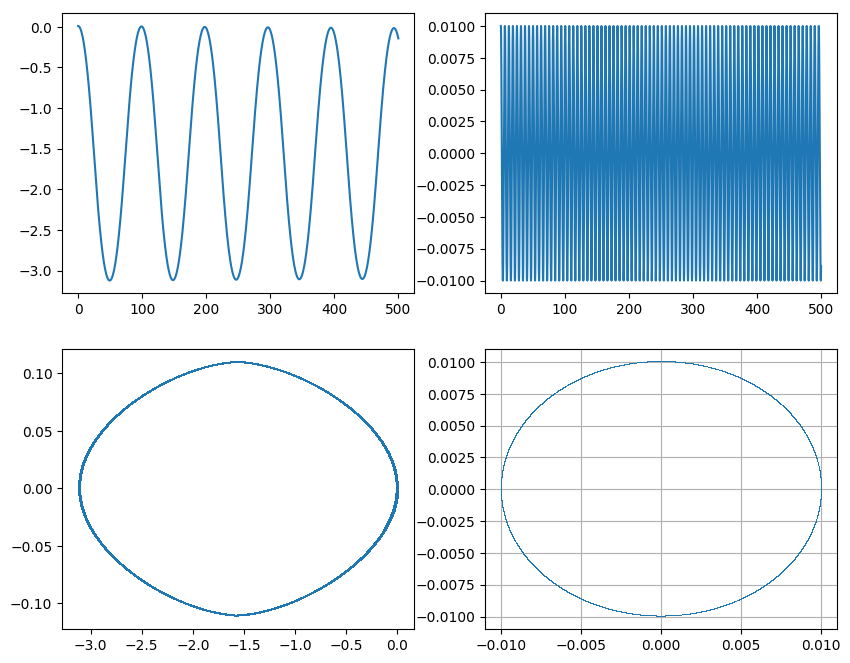

In [13]:
ω²=-1.0
x0=0.01 #desplazamiento pequeño
y0=0.0 #condición inicial en la derivada de x
t0=0.0
tf=500.0  #tiempo final de 100 segundos
N=25
ϵ=1e-52
h=0.01
sint1,sinx1,siny1=metRungeKutta2(f1,f3,t0,tf,x0,y0,h)
sint,sinx,siny=integrador(f1,f3,x0,y0,t0,tf,ϵ,N)
fig = figure(figsize = (10, 8))
ax = subplot(221); bx = subplot(222)
ay = subplot(223); by = subplot(224)
ax[:plot](sint, sinx); bx[:plot](sint1, sinx1)
ay[:plot](sinx, siny,label="E-fase",","); by[:plot](sinx1, siny1,label="E-fase",",")
grid()

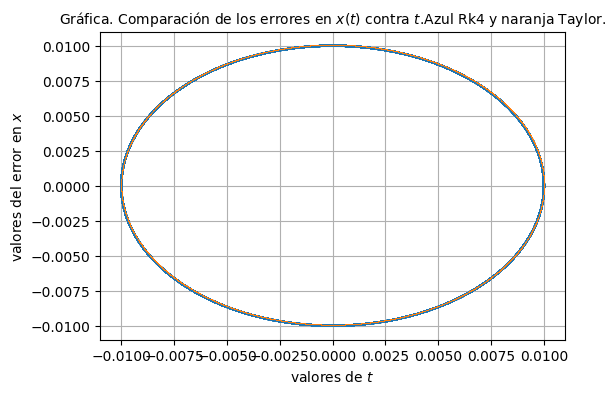

In [9]:
figure(figsize=(6,4)) # este comando define el tamaño de la figura
plot(sinx1,siny1)
plot(x1,y1,",")
title(L"Gráfica. Comparación de los errores en $x(t)$ contra $t$.Azul Rk4 y naranja Taylor.", fontsize=10)
xlabel(L"valores de $t$")
ylabel(L"valores del error en $x$")
grid()

$$f(t)=\cos(t)$$
$$f(t)=f(t_0)+f^{(1)}(t_0)(t-t_0)+\frac{f^{(2)}(t_0)}{2!}(t-t_0)^2+\cdots +\frac{f^{(n)}(t_0)}{n!}(t-t_0)^n+\cdots$$

$$\begin{array}{l}
 \dot{x}=f1(t,x,y)=y\\
 \ddot{x}=f2(t,x,y)=-\sin(x)
\end{array}$$

Escribimos, como aproximación de primer orden a la solución en la forma 

$$x(t) = x_0 + x_{[1]} (t-t_0) +x_{[2]} (t-t_0)^2+ \mathcal{O}((t-t_0)^3)$$
$$y(t) = y_0 + y_{[1]} (t-t_0) +y_{[2]} (t-t_0)^2+ \mathcal{O}((t-t_0)^3)$$


$$\begin{array}{l}
 \dot{x}=y\\
 \dot{y}=-\sin(x)
\end{array}\hspace{.5cm}\Rightarrow
\begin{array}{l}
 x_{[1]}+\mathcal{O}((t-t_0))=y_0+\mathcal{O}((t-t_0))\\
 y_{[1]}+\mathcal{O}((t-t_0))=-\sin(x_0 + \mathcal{O}((t-t_0)))
\end{array}\hspace{.5cm}\Rightarrow
\begin{array}{l}
 x_{[1]}=y_0\\
 y_{[1]}+\mathcal{O}((t-t_0))=
\end{array}\hspace{.5cm}\Rightarrow$$

